<a href="https://colab.research.google.com/drive/1bH2HsgWpUCTqBZTght2mr3_ljw3XTrz2#scrollTo=5VIGyIus8Vr7" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pour rouler et voir les résultats.

# Install

In [ ]:
#obtenir les fichier du repo cycleGAN
!git clone https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix

Cloning into 'pytorch-CycleGAN-and-pix2pix'...
remote: Enumerating objects: 2337, done.
remote: Total 2337 (delta 0), reused 0 (delta 0), pack-reused 2337
Receiving objects: 100% (2337/2337), 8.09 MiB | 32.62 MiB/s, done.
Resolving deltas: 100% (1499/1499), done.


In [ ]:
import os
os.chdir('pytorch-CycleGAN-and-pix2pix/')

In [ ]:
!pip install -r requirements.txt

     |████████████████████████████████| 686kB 13.4MB/s 
     |████████████████████████████████| 61kB 8.2MB/s 
  Created wheel for visdom: filename=visdom-0.1.8.9-cp37-none-any.whl size=655251 sha256=49160389e90d452528a034474d7b04fd059dd2c4a61a5ce0b283462685b62460
  Stored in directory: /root/.cache/pip/wheels/70/19/a7/6d589ed967f4dfefd33bc166d081257bd4ed0cb618dccfd62a
  Created wheel for torchfile: filename=torchfile-0.1.0-cp37-none-any.whl size=5713 sha256=903b5bdb12257b4b391b245a037162c104f55052bbacea2a99bdfe9dae4e1aca
  Stored in directory: /root/.cache/pip/wheels/b1/c3/d6/9a1cc8f3a99a0fc1124cae20153f36af59a6e683daca0a0814
Successfully built visdom torchfile


# Datasets

Use your own dataset by creating the appropriate folders and adding in the images.

-   Create a dataset folder under `/dataset` for your dataset.
-   Create subfolders `testA`, `testB`, `trainA`, and `trainB` under your dataset's folder. Place any images you want to transform from a to b (cat2dog) in the `testA` folder, images you want to transform from b to a (dog2cat) in the `testB` folder, and do the same for the `trainA` and `trainB` folders.

Dans notre cas les train et test A sont: blurred->highres, noisy->highres et compressed->highres

Les train et test B sont l'inverse

Choisir quel ensemble de données télécharger. Notez qu'il faudrait changer toutes les instances du mot 'compressed' par le nom de l'ensemble choisi, soit 'blurred' ou 'noisy' dans le reste du colab. Le transfert de style vangogh a des noms de fichiers et dossiers qui diffère. La notation approprié est donnée en commentaires dans les sections ci-dessous.

In [ ]:
##vangogh
# !bash ./datasets/download_cyclegan_dataset.sh vangogh2photo

In [ ]:
##blurred
# os.chdir('datasets')
#!gdown --id 12Gl10WpYUWCzNRUaZXCyEmNcbdu2UnB5 # blurred images
#!unzip blurred.zip
# os.chdir('..')

In [ ]:
##noisy
# os.chdir('datasets')
#!gdown --id 1yMJmXlYoXALOgnkmd6TMNBELBwO62vc8 # noisy images
#!7z x noisy.zip
# os.chdir('..')

In [ ]:
#compressed
os.chdir('datasets')
!gdown --id 13La8tJnwGRSb_VSchg7oYHPHx3lt8CJ5 # compressed images
!unzip compressed.zip
os.chdir('..')

Downloading...
From: https://drive.google.com/uc?id=13La8tJnwGRSb_VSchg7oYHPHx3lt8CJ5
To: /content/pytorch-CycleGAN-and-pix2pix/datasets/compressed.zip
2.78GB [00:24, 113MB/s] 
Archive:  compressed.zip
  inflating: compressed/readme.txt   
   creating: compressed/testA/
  inflating: compressed/testA/img_001.png  
  inflating: compressed/testA/img_002.png  
  inflating: compressed/testA/img_003.png  
  inflating: compressed/testA/img_004.png  
  inflating: compressed/testA/img_005.png  
  inflating: compressed/testA/img_006.png  
  inflating: compressed/testA/img_007.png  
  inflating: compressed/testA/img_008.png  
  inflating: compressed/testA/img_009.png  
  inflating: compressed/testA/img_010.png  
  inflating: compressed/testA/img_011.png  
  inflating: compressed/testA/img_012.png  
  inflating: compressed/testA/img_013.png  
  inflating: compressed/testA/img_014.png  
  inflating: compressed/testA/img_015.png  
  inflating: compressed/testA/img_016.png  
  inflating: compressed/t

# Training 

Seulement rouler cela pour les ensembles de données compressed, blurry et noisy. L'ensemble Vangogh a déjà un modèle préentrainé qu'on utilise.

Instructions:
Use `cp ./checkpoints/horse2zebra/latest_net_G_A.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class A to class B and `cp ./checkpoints/horse2zebra/latest_net_G_B.pth ./checkpoints/horse2zebra/latest_net_G.pth` if you want to transform images from class B to class A.


In [ ]:
##blurred
#!python train.py --dataroot ./datasets/blurred --name blurred --model cycle_gan

In [ ]:
##noisy
#!python train.py --dataroot ./datasets/noisy --name noisy --model cycle_gan

In [ ]:
#compressed
#ne pas entraîner pour le transfert de style vangogh, plutot utiliser le modèle préentraîné
!python train.py --dataroot ./datasets/compressed --name compressed --model cycle_gan #--continue_train --epoch_count 194 #pour continuer si jamais l'entrainement s'était coupé

----------------- Options ---------------
               batch_size: 1                             
                    beta1: 0.5                           
          checkpoints_dir: ./checkpoints                 
           continue_train: True                          	[default: False]
                crop_size: 256                           
                 dataroot: ./datasets/compressed         	[default: None]
             dataset_mode: unaligned                     
                direction: AtoB                          
              display_env: main                          
             display_freq: 400                           
               display_id: 1                             
            display_ncols: 4                             
             display_port: 8097                          
           display_server: http://localhost              
          display_winsize: 256                           
                    epoch: latest                      

In [ ]:
#choisir le modèle le plus récent de l'entraînement
cp ./checkpoints/compressed/latest_net_G_A.pth ./checkpoints/compressed/latest_net_G.pth

#Pretrained Models

In [ ]:
#download Vangogh pretrained model
!bash ./scripts/download_cyclegan_model.sh style_vangogh

Note: available models are apple2orange, orange2apple, summer2winter_yosemite, winter2summer_yosemite, horse2zebra, zebra2horse, monet2photo, style_monet, style_cezanne, style_ukiyoe, style_vangogh, sat2map, map2sat, cityscapes_photo2label, cityscapes_label2photo, facades_photo2label, facades_label2photo, iphone2dslr_flower
Specified [style_vangogh]
for details.

--2021-04-30 16:39:43--  http://efrosgans.eecs.berkeley.edu/cyclegan/pretrained_models/style_vangogh.pth
Resolving efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)... 128.32.244.190
Connecting to efrosgans.eecs.berkeley.edu (efrosgans.eecs.berkeley.edu)|128.32.244.190|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45575747 (43M)
Saving to: ‘./checkpoints/style_vangogh_pretrained/latest_net_G.pth’

./checkpoints/style 100%[===================>]  43.46M  2.71MB/s    in 12s     

2021-04-30 16:39:55 (3.56 MB/s) - ‘./checkpoints/style_vangogh_pretrained/latest_net_G.pth’ saved [45575747/45575747]

In [ ]:
#note qu'une fois que nous avons entraîné les modèles blurred, noisy et compressed, on peut les sauvegarder et aussi directement les utiliser plus tard
import os
if not os.path.isdir('checkpoints'):
  os.mkdir('checkpoints')
os.chdir('checkpoints')

#blurred
# if not os.path.isdir('blurred'):
#   os.mkdir('blurred')
# os.chdir('blurred')
# !gdown --id 1TeAGzHAWuZ-5o56deIOjtzQO6G7YlFlc
# !unzip blurredModels.zip

#noisy
#if not os.path.isdir('noisy'):
#  os.mkdir('noisy')
#os.chdir('noisy')
#!gdown --id 1yHn8caZf8gPm7FDsgejkyXLcBcux4P5B
#!unzip noisyModels.zip

#compressed
if not os.path.isdir('compressed'):
 os.mkdir('compressed')
os.chdir('compressed')
!gdown --id 1m_X0UCcoCDyr4ZtB3o-6G7NnCWNuNdKi
!unzip compressedModels.zip

os.rename('latest_net_G_A.pth', 'latest_net_G.pth')
os.chdir('../..')

Downloading...
From: https://drive.google.com/uc?id=1m_X0UCcoCDyr4ZtB3o-6G7NnCWNuNdKi
To: /content/pytorch-CycleGAN-and-pix2pix/checkpoints/compressed/compressedModels.zip
105MB [00:00, 183MB/s]
Archive:  compressedModels.zip
  inflating: latest_net_D_A.pth      
  inflating: latest_net_D_B.pth      
  inflating: latest_net_G_A.pth      
  inflating: latest_net_G_B.pth      


In [ ]:
pwd

'/content/pytorch-CycleGAN-and-pix2pix'

# Testing

-   `python test.py --dataroot datasets/horse2zebra/testA --name horse2zebra_pretrained --model test --no_dropout`

Change the `--dataroot` and `--name` to be consistent with your trained model's configuration.

> from https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix:
> The option --model test is used for generating results of CycleGAN only for one side. This option will automatically set --dataset_mode single, which only loads the images from one set. On the contrary, using --model cycle_gan requires loading and generating results in both directions, which is sometimes unnecessary. The results will be saved at ./results/. Use --results_dir {directory_path_to_save_result} to specify the results directory.

> For your own experiments, you might want to specify --netG, --norm, --no_dropout to match the generator architecture of the trained model.

In [ ]:
#vangogh
#!python test.py --dataroot datasets/vangogh2photo/testA --name style_vangogh_pretrained --model test --no_dropout --num_test 100

In [ ]:
#blurred
#!python test.py --dataroot datasets/blurred/testA --name blurred --model test --no_dropout --num_test 100

In [ ]:
#noisy
#!python test.py --dataroot datasets/noisy/testA --name noisy --model test --no_dropout --num_test 100

In [ ]:
#tester avecd les images de Urban100 modifiées
#compressed
!python test.py --dataroot datasets/compressed/testA --name compressed --model test --no_dropout --num_test 100

----------------- Options ---------------
             aspect_ratio: 1.0                           
               batch_size: 1                             
          checkpoints_dir: ./checkpoints                 
                crop_size: 256                           
                 dataroot: datasets/compressed/testA     	[default: None]
             dataset_mode: single                        
                direction: AtoB                          
          display_winsize: 256                           
                    epoch: latest                        
                     eval: False                         
                  gpu_ids: 0                             
                init_gain: 0.02                          
                init_type: normal                        
                 input_nc: 3                             
                  isTrain: False                         	[default: None]
                load_iter: 0                            

# Visualize

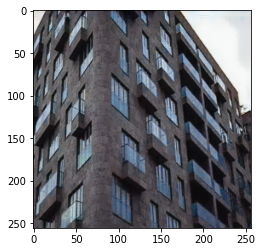

In [ ]:
#image resultante de cycleGan
import matplotlib.pyplot as plt

#le nom des dossiers et fichiers peuvent changer dépendant du dataset choisi.

#img = plt.imread('./results/style_vangogh_pretrained/test_latest/images/00001_fake.png')
#img = plt.imread('./results/blurred/test_latest/images/img_001_fake.png')
#img = plt.imread('./results/noisy/test_latest/images/img_001_fake.png')
img = plt.imread('./results/compressed/test_latest/images/img_001_fake.png')

plt.imshow(img)

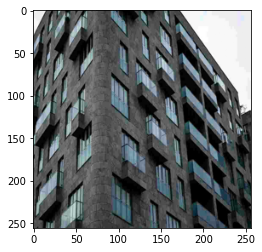

In [ ]:
#image initiale
import matplotlib.pyplot as plt

#img = plt.imread('./results/style_vangogh_pretrained/test_latest/images/00001_real.png')
#img = plt.imread('./results/blurred/test_latest/images/img_001_real.png')
#img = plt.imread('./results/noisy/test_latest/images/img_001_real.png')
img = plt.imread('./results/compressed/test_latest/images/img_001_real.png')
plt.imshow(img)

#Download results and models

In [ ]:
#zip pour télécharger les résultats

#!zip -r /content/vangoghResults.zip /content/pytorch-CycleGAN-and-pix2pix/results/style_vangogh_pretrained/
#!zip -r /content/blurredResults.zip /content/pytorch-CycleGAN-and-pix2pix/results/blurred/
#!zip -r /content/noisyResults.zip /content/pytorch-CycleGAN-and-pix2pix/results/noisy/
!zip -r /content/compressedResults.zip /content/pytorch-CycleGAN-and-pix2pix/results/compressed/

  adding: content/pytorch-CycleGAN-and-pix2pix/results/compressed/ (stored 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/compressed/test_latest/ (stored 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/compressed/test_latest/images/ (stored 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/compressed/test_latest/images/img_002_fake.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/compressed/test_latest/images/img_011_fake.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/compressed/test_latest/images/img_009_fake.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/compressed/test_latest/images/img_044_fake.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/compressed/test_latest/images/img_023_fake.png (deflated 0%)
  adding: content/pytorch-CycleGAN-and-pix2pix/results/compressed/test_latest/images/img_027_real.png (deflated 0%)
  adding: content/pytorch-CycleGAN-a

In [ ]:
from google.colab import files
#files.download("/content/vangoghResults.zip")
#files.download("/content/blurredResults.zip")
#files.download("/content/noisyResults.zip")
files.download("/content/compressedResults.zip")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
#download models

#name = 'vangogh'
#name = 'blurred'
#name = 'noisy'
name = 'compressed'

files.download("checkpoints/"+name+"/latest_net_D_A.pth")
files.download("checkpoints/"+name+"/latest_net_D_B.pth")
files.download("checkpoints/"+name+"/latest_net_G_A.pth")
files.download("checkpoints/"+name+"/latest_net_G_B.pth")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>